# Ejercicio 12
# Práctica 3
# Javier Francisco Castilla Jiménez

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import NeuralFunctJC as nrn
plt.style.use('Solarize_Light2')
%matplotlib inline

In [7]:
neuronas=['a','A','B','C','D','E','F','G','H','I']
clase=['GG','GE','EG','EE']
llaves1=['estimulo1A','estimulo1E']
llaves2=['estimulo2A','estimulo2E']
#carguemos los tiempos de las neuronas de S1
TS1a=nrn.importar('TiemposNeuS1.csv')
TS1A=nrn.importar('TiemposNeuS1A.csv')
TS1B=nrn.importar('TiemposNeuS1B.csv')
TS1C=nrn.importar('TiemposNeuS1C.csv')
TS1D=nrn.importar('TiemposNeuS1D.csv')
TS1E=nrn.importar('TiemposNeuS1E.csv')
TS1F=nrn.importar('TiemposNeuS1F.csv')
TS1G=nrn.importar('TiemposNeuS1G.csv')
TS1H=nrn.importar('TiemposNeuS1H.csv')
TS1I=nrn.importar('TiemposNeuS1I.csv')
tiemposS1={'a':TS1a,'A':TS1A,'B':TS1B,'C':TS1C,'D':TS1D,'E':TS1E,'F':TS1F,'G':TS1G,'H':TS1H,'I':TS1I} # lista de listas con los np.ndarrays de lod tiempos de ocurrencia de las espigas
########################################### cargamos bloques
bqa=list(nrn.bloques(nrn.abrir('TiemposNeuS1.csv')))
bqA=list(nrn.bloques(nrn.abrir('TiemposNeuS1A.csv')))
bqB=list(nrn.bloques(nrn.abrir('TiemposNeuS1B.csv')))
bqC=list(nrn.bloques(nrn.abrir('TiemposNeuS1C.csv')))
bqD=list(nrn.bloques(nrn.abrir('TiemposNeuS1D.csv')))
bqE=list(nrn.bloques(nrn.abrir('TiemposNeuS1E.csv')))
bqF=list(nrn.bloques(nrn.abrir('TiemposNeuS1F.csv')))
bqG=list(nrn.bloques(nrn.abrir('TiemposNeuS1G.csv')))
bqH=list(nrn.bloques(nrn.abrir('TiemposNeuS1H.csv')))
bqI=list(nrn.bloques(nrn.abrir('TiemposNeuS1I.csv')))
bqs={'a':bqa,'A':bqA,'B':bqB,'C':bqC,'D':bqD,'E':bqE,'F':bqF,'G':bqG,'H':bqH,'I':bqI} 

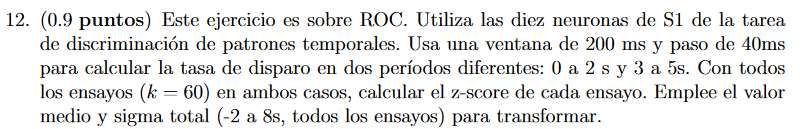

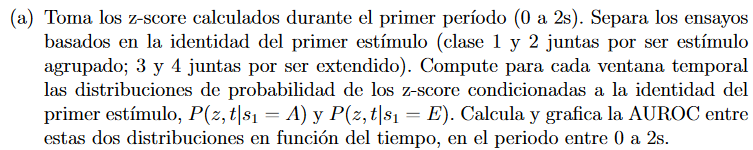

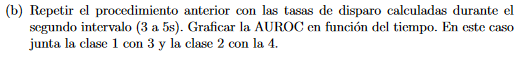

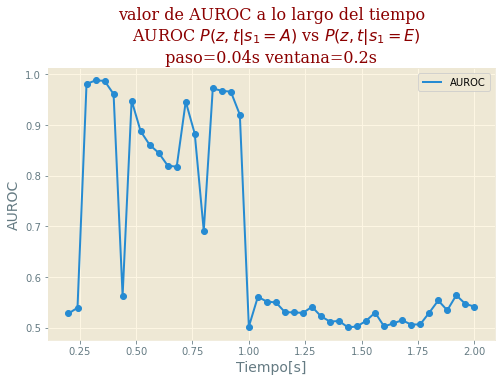

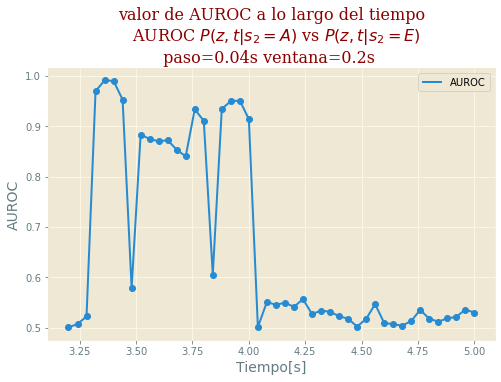

In [14]:
# todas las tasas de disparo en diccionario de neuronas
Ts=nrn.dicneuronrate(tiemposS1,neuronas,start=-2,stop=8,paso=0.04,ventana=0.2)
ms=dict() #diccionario para la media y la sigma totales de una neurona
for neuron in neuronas:
    mu=np.mean(Ts[neuron])
    sg=np.std(Ts[neuron])
    ms.update({neuron:(mu,sg)}) 
############## tasas de disparo en periodos 0 a 2s y 3 a 5s
Ts_p1=nrn.dicneuronrate(tiemposS1,neuronas,start=0,stop=2,paso=0.04,ventana=0.2)
Ts_p2=nrn.dicneuronrate(tiemposS1,neuronas,start=3,stop=5,paso=0.04,ventana=0.2)


################# z-score total en primer periodo
zs_p1=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p1[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada
    zs_p1.update({neuron:z})
########## z-score separada de acuerdo a primer estímulo
zxest_1=nrn.txprimerest(zs_p1,neuronas,llaves1,bqs)#z separado

################# z-score en el segundo periodo
zs_p2=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p2[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs_p2.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
########## z-score separada de acuerdo a primer estímulo
zxest_2=nrn.txsegundoest(zs_p2,neuronas,llaves2,bqs)#z separado


##########separo las las z-condicionadas
est1A,est1E=nrn.divid_est(zxest_1,neuronas,llaves1)
est2A,est2E=nrn.divid_est(zxest_2,neuronas,llaves2)
################## cálculo las probabilidades condicionadas
pest1A,pest1E,binest1=nrn.GetDistributions_wnd(est1A,est1E)
pest2A,pest2E,binest2=nrn.GetDistributions_wnd(est2A,est2E)

#######bordes superiores y número de ventanas
bsup1,nvenest1=nrn.bordesup(start=0,stop=2,paso=0.04,ventana=0.2,nv=True)
bsup2,nvenest2=nrn.bordesup(start=3,stop=5,paso=0.04,ventana=0.2,nv=True)

############## AUROC a lo largo del tiempo
AUROCest1=nrn.AUROClist(pest1A,pest1E,nvenest1)
AUROCest2=nrn.AUROClist(pest2A,pest2E,nvenest1)

#########################GRAFICAS
########################grafica 1
fig=plt.figure(figsize=(8,5))
plt.plot(bsup1,AUROCest1,label='AUROC')
plt.scatter(bsup1,AUROCest1)
plt.ylabel("AUROC",fontsize=14)
plt.xlabel("Tiempo[s]",fontsize=14)
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
plt.title("valor de AUROC a lo largo del tiempo\n  AUROC $P(z,t|s_1=A)$ vs $P(z,t|s_1=E)$\n paso=0.04s ventana=0.2s ",fontdict_title)
plt.legend()
plt.show()
#######################grafica 2 
fig=plt.figure(figsize=(8,5))
plt.plot(bsup2,AUROCest2,label='AUROC')
plt.scatter(bsup2,AUROCest2)
plt.ylabel("AUROC",fontsize=14)
plt.xlabel("Tiempo[s]",fontsize=14)
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
plt.title("valor de AUROC a lo largo del tiempo\n  AUROC $P(z,t|s_2=A)$ vs $P(z,t|s_2=E)$\n paso=0.04s ventana=0.2s  ",fontdict_title)
plt.legend()
plt.show()


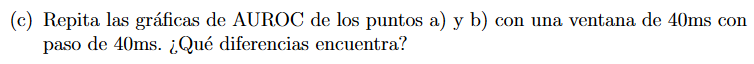

estas gráficas tienen más picos eso se debe a que están hechas con una ventana más pequeña que las y nos permite notar que con la gráfica anterior estabamos perdiendo parte de la información, más especificamente las fluctuaciones y los picos y valles que toma el valor del AUROC a lo largo del tiempo

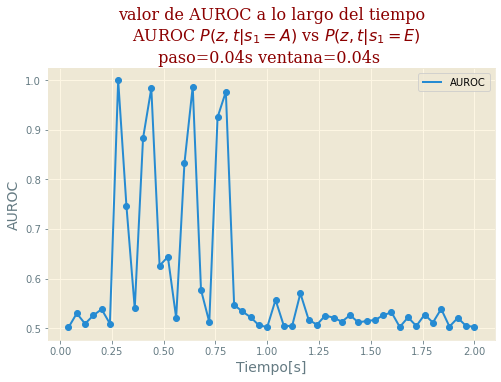

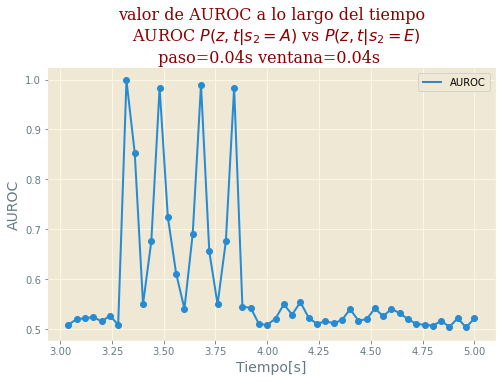

In [15]:
# todas las tasas de disparo en diccionario de neuronas
Ts=nrn.dicneuronrate(tiemposS1,neuronas,start=-2,stop=8,paso=0.04,ventana=0.04)
ms=dict() #diccionario para la media y la sigma totales de una neurona
for neuron in neuronas:
    mu=np.mean(Ts[neuron])
    sg=np.std(Ts[neuron])
    ms.update({neuron:(mu,sg)}) 
############## tasas de disparo en periodos 0 a 2s y 3 a 5s
Ts_p1=nrn.dicneuronrate(tiemposS1,neuronas,start=0,stop=2,paso=0.04,ventana=0.04)
Ts_p2=nrn.dicneuronrate(tiemposS1,neuronas,start=3,stop=5,paso=0.04,ventana=0.04)


################# z-score total en primer periodo
zs_p1=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p1[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada
    zs_p1.update({neuron:z})
########## z-score separada de acuerdo a primer estímulo
zxest_1=nrn.txprimerest(zs_p1,neuronas,llaves1,bqs)#z separado

################# z-score en el segundo periodo
zs_p2=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p2[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs_p2.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
########## z-score separada de acuerdo a primer estímulo
zxest_2=nrn.txsegundoest(zs_p2,neuronas,llaves2,bqs)#z separado


##########separo las las z-condicionadas
est1A,est1E=nrn.divid_est(zxest_1,neuronas,llaves1)
est2A,est2E=nrn.divid_est(zxest_2,neuronas,llaves2)
################## cálculo las probabilidades condicionadas
pest1A,pest1E,binest1=nrn.GetDistributions_wnd(est1A,est1E)
pest2A,pest2E,binest2=nrn.GetDistributions_wnd(est2A,est2E)

#######bordes superiores y número de ventanas
bsup1,nvenest1=nrn.bordesup(start=0,stop=2,paso=0.04,ventana=0.04,nv=True)
bsup2,nvenest2=nrn.bordesup(start=3,stop=5,paso=0.04,ventana=0.04,nv=True)

############## AUROC a lo largo del tiempo
AUROCest1=nrn.AUROClist(pest1A,pest1E,nvenest1)
AUROCest2=nrn.AUROClist(pest2A,pest2E,nvenest1)

#########################GRAFICAS
########################grafica 1
fig=plt.figure(figsize=(8,5))
plt.plot(bsup1,AUROCest1,label='AUROC')
plt.scatter(bsup1,AUROCest1)
plt.ylabel("AUROC",fontsize=14)
plt.xlabel("Tiempo[s]",fontsize=14)
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
plt.title("valor de AUROC a lo largo del tiempo\n  AUROC $P(z,t|s_1=A)$ vs $P(z,t|s_1=E)$\n paso=0.04s ventana=0.04s  ",fontdict_title)
plt.legend()
plt.show()
#######################grafica 2 
fig=plt.figure(figsize=(8,5))
plt.plot(bsup2,AUROCest2,label='AUROC')
plt.scatter(bsup2,AUROCest2)
plt.ylabel("AUROC",fontsize=14)
plt.xlabel("Tiempo[s]",fontsize=14)
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
plt.title("valor de AUROC a lo largo del tiempo\n  AUROC $P(z,t|s_2=A)$ vs $P(z,t|s_2=E)$\n paso=0.04s ventana=0.04s  ",fontdict_title)
plt.legend()
plt.show()


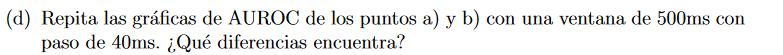

Estás gráficas con esta combinación de paso y ventana al ser tan grande la ventana distorsiona los puntos de mayor valor del AUROC y e incluso distorsiona un poco la temporalidad

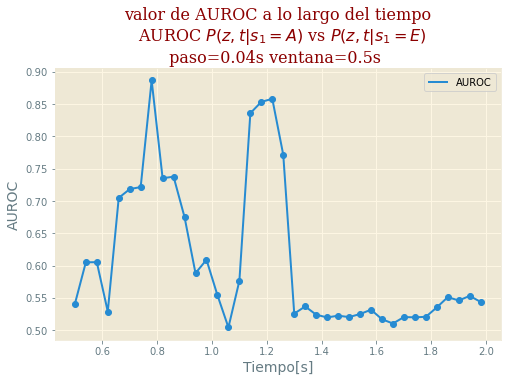

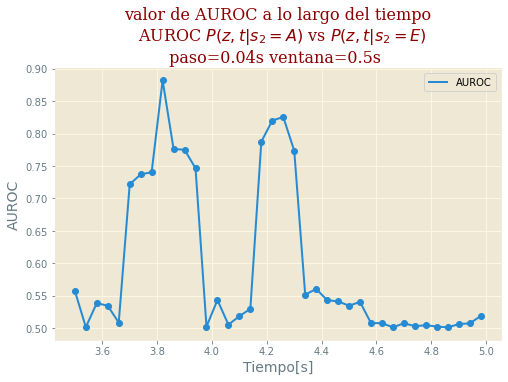

In [17]:
# todas las tasas de disparo en diccionario de neuronas
Ts=nrn.dicneuronrate(tiemposS1,neuronas,start=-2,stop=8,paso=0.04,ventana=0.5)
ms=dict() #diccionario para la media y la sigma totales de una neurona
for neuron in neuronas:
    mu=np.mean(Ts[neuron])
    sg=np.std(Ts[neuron])
    ms.update({neuron:(mu,sg)}) 
############## tasas de disparo en periodos 0 a 2s y 3 a 5s
Ts_p1=nrn.dicneuronrate(tiemposS1,neuronas,start=0,stop=2,paso=0.04,ventana=0.5)
Ts_p2=nrn.dicneuronrate(tiemposS1,neuronas,start=3,stop=5,paso=0.04,ventana=0.5)


################# z-score total en primer periodo
zs_p1=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p1[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada
    zs_p1.update({neuron:z})
########## z-score separada de acuerdo a primer estímulo
zxest_1=nrn.txprimerest(zs_p1,neuronas,llaves1,bqs)#z separado

################# z-score en el segundo periodo
zs_p2=dict()# diccionario vacio
for neuron in neuronas:
    z=nrn.zej11(Ts_p2[neuron],ms[neuron]) # cada z corresponde un array de z-score dónde cada fila es un ensayo y cada columna un ventana temporal. En este caso el número de ensayos varía según la neurona pero el número de ventanas es 531
    zs_p2.update({neuron:z})# agrego un par llave:valor al diccionario de z por neurona
########## z-score separada de acuerdo a primer estímulo
zxest_2=nrn.txsegundoest(zs_p2,neuronas,llaves2,bqs)#z separado


##########separo las las z-condicionadas
est1A,est1E=nrn.divid_est(zxest_1,neuronas,llaves1)
est2A,est2E=nrn.divid_est(zxest_2,neuronas,llaves2)
################## cálculo las probabilidades condicionadas
pest1A,pest1E,binest1=nrn.GetDistributions_wnd(est1A,est1E)
pest2A,pest2E,binest2=nrn.GetDistributions_wnd(est2A,est2E)

#######bordes superiores y número de ventanas
bsup1,nvenest1=nrn.bordesup(start=0,stop=2,paso=0.04,ventana=0.5,nv=True)
bsup2,nvenest2=nrn.bordesup(start=3,stop=5,paso=0.04,ventana=0.5,nv=True)

############## AUROC a lo largo del tiempo
AUROCest1=nrn.AUROClist(pest1A,pest1E,nvenest1)
AUROCest2=nrn.AUROClist(pest2A,pest2E,nvenest1)

#########################GRAFICAS
########################grafica 1
fig=plt.figure(figsize=(8,5))
plt.plot(bsup1,AUROCest1,label='AUROC')
plt.scatter(bsup1,AUROCest1)
plt.ylabel("AUROC",fontsize=14)
plt.xlabel("Tiempo[s]",fontsize=14)
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
plt.title("valor de AUROC a lo largo del tiempo\n  AUROC $P(z,t|s_1=A)$ vs $P(z,t|s_1=E)$\n paso=0.04s ventana=0.5s  ",fontdict_title)
plt.legend()
plt.show()
#######################grafica 2 
fig=plt.figure(figsize=(8,5))
plt.plot(bsup2,AUROCest2,label='AUROC')
plt.scatter(bsup2,AUROCest2)
plt.ylabel("AUROC",fontsize=14)
plt.xlabel("Tiempo[s]",fontsize=14)
fontdict_title = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16,}
plt.title("valor de AUROC a lo largo del tiempo\n  AUROC $P(z,t|s_2=A)$ vs $P(z,t|s_2=E)$\n paso=0.04s ventana=0.5s  ",fontdict_title)
plt.legend()
plt.show()


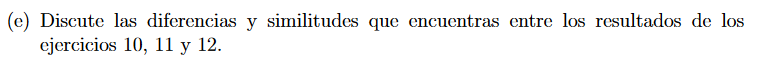

Pues en particular las gráficas de los ejercicio 11 y 12 son muy similares tienen las mismás formas en las mismas temporalidades, esto nos habla de que debe existir una fuerte correlación entre lo que nos están diciendo ambas métricas. AUROC e Información mutua de Shanon son dos métricas fuertemente correlacionadas y estos ejercicio reflejan eso. Sin embargo hay situaciones dónde es mejor usar alguna de las dos métricas y justamente eso es lo que muestra el ejercicio 10, cómo el AUROC es una gran herramienta para estudiar latencia y responsividad. 